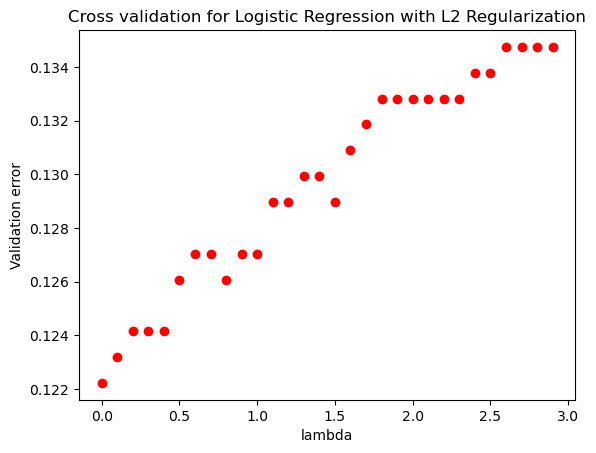

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl_pre
from sklearn import preprocessing
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms

import warnings
warnings.filterwarnings('ignore')
#%%
"Load dataset"
film = pd.read_csv('C:/Users/Dell/Documents/Physics/Machine Learning/Project/train.csv',dtype={'Lead': str})
#%%
"Split inputs,Labels"

X_train_data = film.drop('Lead', axis=1)
Y_train_data = film['Lead']
#%%
"Normalize Data"
scaler = preprocessing.StandardScaler().fit(X_train_data)
X_train = scaler.transform(X_train_data)
Y_train = Y_train_data
    
#%%
"10-fold Cross validation"
n_fold = 10
"With l2 Regularization"

cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)
lamda_values = np.arange(0.00001,3,0.1)
misclassification = np.zeros(len(lamda_values))

for train_index, val_index in cv.split(X_train):
    X_t, X_val = X_train[train_index], X_train[val_index]
    Y_t, y_val = Y_train_data.iloc[train_index], Y_train_data.iloc[val_index]


    for j, lamda in enumerate(lamda_values):
        model = skl_lm.LogisticRegression(penalty='l2',C=1/lamda)
        model.fit(X_t, Y_t)
        prediction = model.predict(X_val)
        misclassification[j] += np.mean(prediction != y_val)
misclassification /= n_fold

plt.figure()
plt.plot(lamda_values, misclassification,'ro',label='val error')
plt.title('Cross validation for Logistic Regression with L2 Regularization')
plt.xlabel('lambda')
plt.ylabel('Validation error')
plt.show()

In [4]:
def class_error(y,yt):
    fmask = (y == yt)
    classific = np.zeros(len(y))
    classific[fmask] = 1
    classific[~fmask]= 0
    return np.mean(1-classific)
    
lamda = 0.0001
Creg = 1/lamda

log_reg = skl_lm.LogisticRegression(penalty='l2',C=Creg)

log_reg.fit(X_train,Y_train)

Ypred_train = log_reg.predict(X_train)

print("Regularization lambda=",lamda)
print("train error    ", class_error(Y_train,Ypred_train))
print('alt train error',np.mean(Ypred_train!=Y_train))
print("train accuracy ", log_reg.score(X_train,Y_train))

Regularization lambda= 0.0001
train error     0.12127045235803657
alt train error 0.12127045235803657
train accuracy  0.8787295476419634
